<h5 style="font-weight: bold; margin: 10px;"> Importing Libraries </h5>
<ul style="padding-top: 0; border-top: 0; margin-top:0;" >
    <li> Libraries for data analysis and visualization</li>
    <li> Libraries to ignore warnings </li>
    <li> Libraries for model data processing, model training and evaluation</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h5> <strong> Importing dataset </strong> </h5>

In [2]:
df = pd.read_csv('train.csv')

<h5> <strong> Dataset analysis </strong> </h5>

In [3]:
df.head()

,UserId,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Class
0,1213375,8.0,4.0,4.0,5.0,4.0,7.0,NaN,8.0,0
1,1268766,1.0,1.0,NaN,1.0,2.0,1.0,1.0,1.0,0
2,695091,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0
3,1238464,1.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,0
4,1350319,NaN,7.0,4.0,1.0,6.0,1.0,7.0,10.0,1


In [4]:
df.isna().sum()

UserId       0
Feature1    16
Feature2    23
Feature3    36
Feature4    36
Feature5    46
Feature6    67
Feature7    69
Feature8    71
Class        0
dtype: int64

In [5]:
df.shape

(564, 10)

In [6]:
for col in df.columns:
    if col == 'UserId':continue
    a = df[col].unique()
    a.sort()
    print(a)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[ 1.  2.  3.  4.  5.  6.  7.  8. 10. nan]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[0 1]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UserId    564 non-null    int64  
 1   Feature1  548 non-null    float64
 2   Feature2  541 non-null    float64
 3   Feature3  528 non-null    float64
 4   Feature4  528 non-null    float64
 5   Feature5  518 non-null    float64
 6   Feature6  497 non-null    float64
 7   Feature7  495 non-null    float64
 8   Feature8  493 non-null    float64
 9   Class     564 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 44.2 KB


In [8]:
df.UserId.value_counts()

1182404    4
1198641    3
1339781    2
897471     2
769612     2
          ..
1255384    1
1321264    1
1371026    1
476903     1
1002504    1
Name: UserId, Length: 530, dtype: int64

<h5 style="font-weight: bold; margin: 10px;"> Data preprocessing </h5>
<ul style="padding-top: 0; border-top: 0; margin-top:0;" >
    <li> Data cleaning (handling missing, incosistent and redundant data) </li>
    <li> Outlier detection and removal </li>
</ul>

In [9]:
#Handling missing data
df.astype(str).astype(float)

for col in df.columns:
    if col == 'UserId':
        continue
    
    df[col].fillna(df[col].mode()[0], inplace = True)

**Note**

Although there are multiple vectors for same User Ids it cannot be directly treated as an incosistency .

In [10]:
#Handling redundant data
df.drop(['UserId'], axis = 1, inplace = True)

<h5> <strong> Outlier detection </strong> (using boxplots) </h5>
<div>
    <img src = "Boxplot.jpg" alt = "Boxplots" style="float: right; width: 30%;">
    <p style="max-width:  700px;"> A box plot is a chart that shows data from a five-number summary including one of the measures of central tendency. It does not show the distribution in particular as much as a stem and leaf plot or histogram does. It is primarily used to indicate a distribution is skewed or not and if there are potential unusual observations (outliers) present in the data set. <br> </br>They're are also very beneficial when large numbers of data sets are involved or compared.</p>
</div>
<!-- It has been a while writing html, excuse me for it :P -->

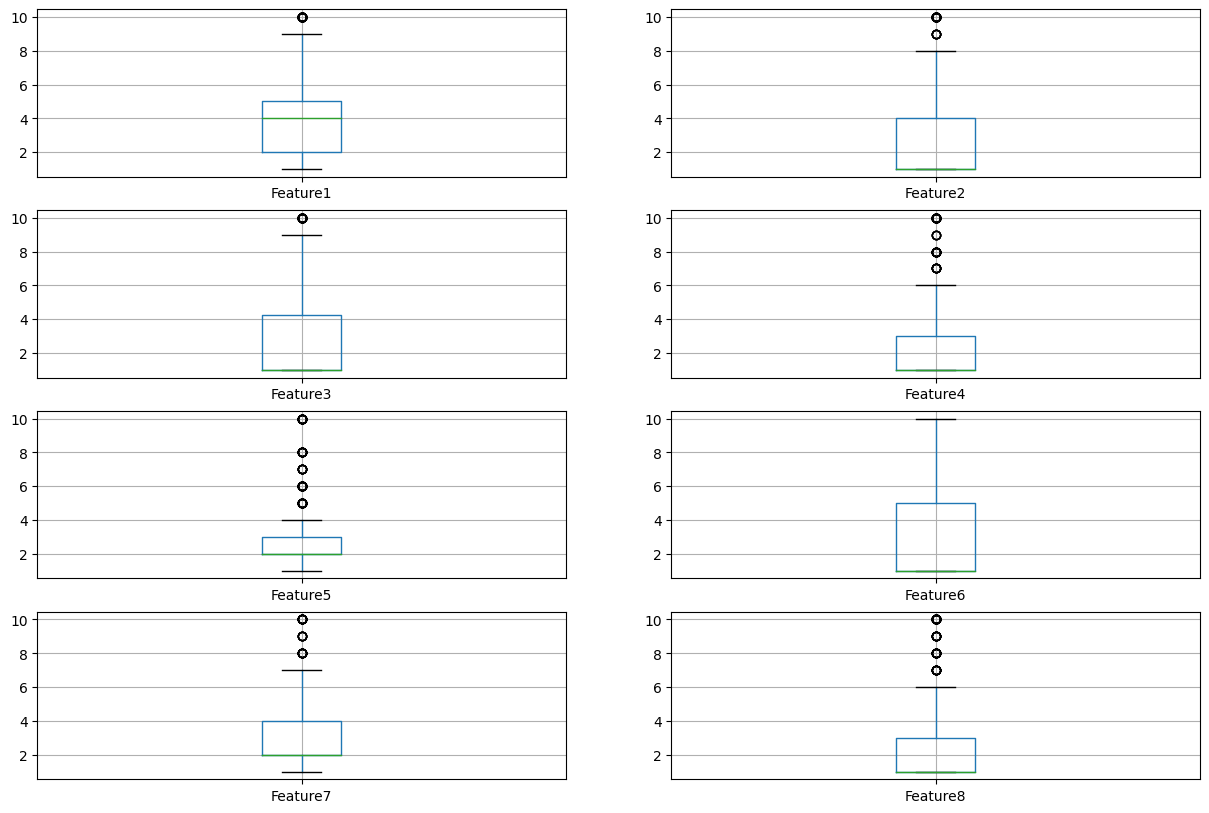

In [11]:
#Outlier detection

plt.figure(figsize=(15,10))

for i in range(len(df.columns)):
    col = df.columns[i]

    if col == 'Class' :
        continue

    plt.subplot(4, 2, i + 1)
    fig = df.boxplot(column = col)
    fig.set_title('')

<h5 style="font-weight: bold; margin: 10px;"> Outlier removal </h5>
<ul style="padding-top: 0; border-top: 0; margin-top:0;" >
    <li> Deleting observations </li>
    <li> Transforming values </li>
    <li> Imputation (We'd be dealing with median imputation) </li>
    <li> Separately treating </li>
</ul>

In [12]:
for col in df.columns:
    if col == 'Class' :
        continue
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[col])

    for i in df[col]:
        if i > Upper_tail or i < Lower_tail:
                df[col] = df[col].replace(i, med)

In [13]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

<h5> <strong> Splitting Dataset </strong> </h5>

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((451, 8), (113, 8))

<h5> <strong> Data visualization </strong> </h5>

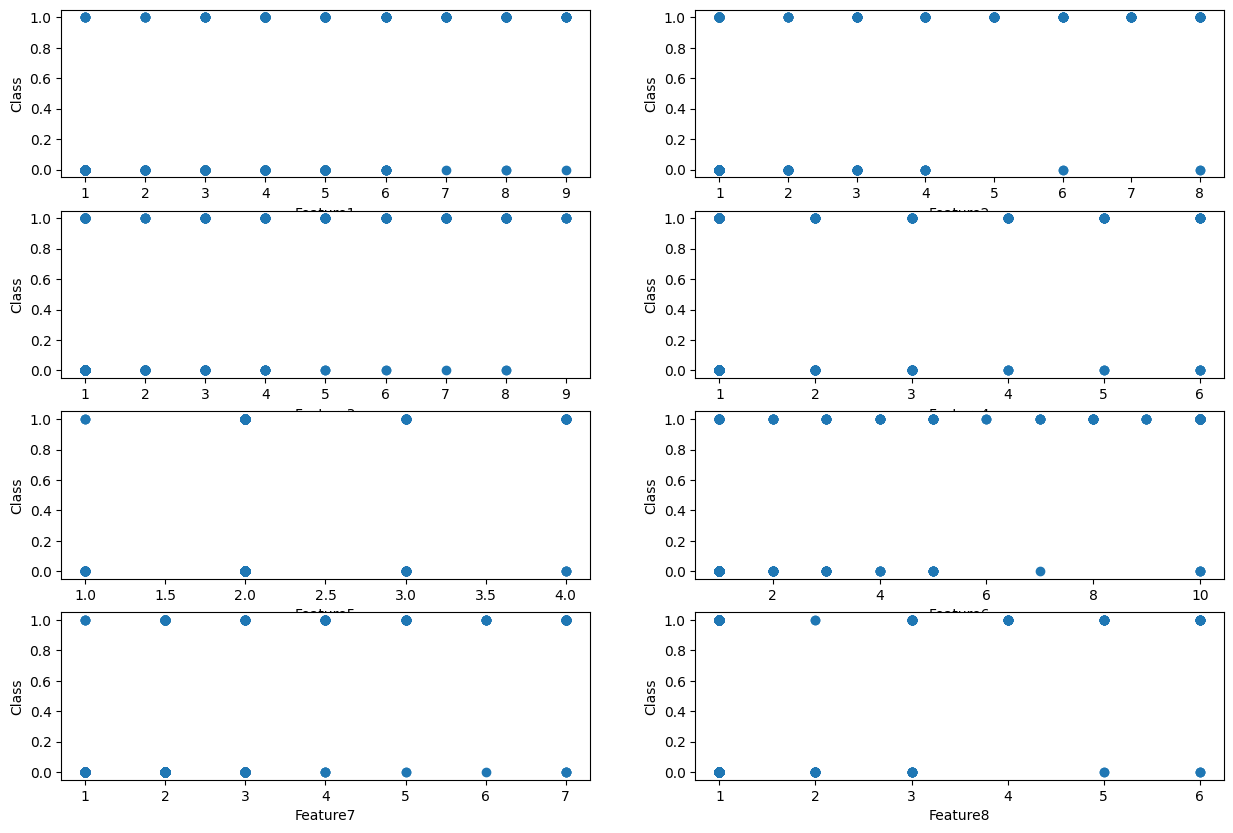

In [15]:
plt.figure(figsize = (15,10))

for i in range(len(df.columns)):
    col = df.columns[i]

    if col == 'Class' :
        continue

    fig = plt.subplot(4, 2, i + 1)
    fig.set_xlabel(col)
    fig.set_ylabel('Class')
    fig.scatter(df[col], df['Class'])

<h5> <strong> Training model </strong> </h5>

In [16]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver = 'liblinear', random_state = 0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

<h5> <strong> Predicting results </strong> </h5>

In [17]:
y_pred_train = logreg.predict(X_train)
y_pred_train

y_pred_test = logreg.predict(X_test)
y_pred_test

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0])

<h5> <strong> Checking accuracy </strong> </h5>

In [18]:
from sklearn.metrics import accuracy_score

print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Training accuracy score: 0.9313
Testing accuracy score: 0.9027


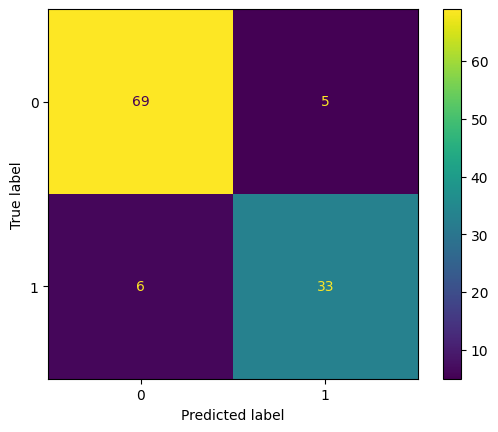

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

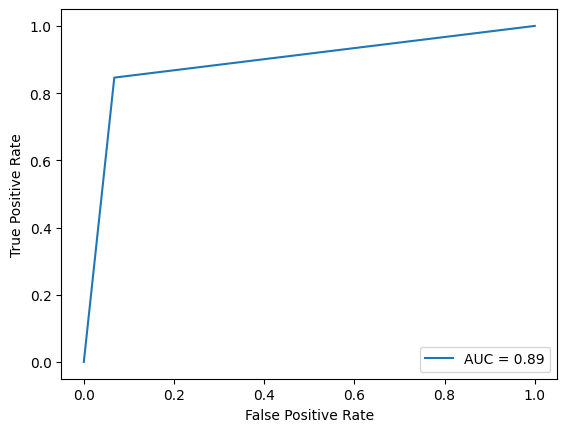

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

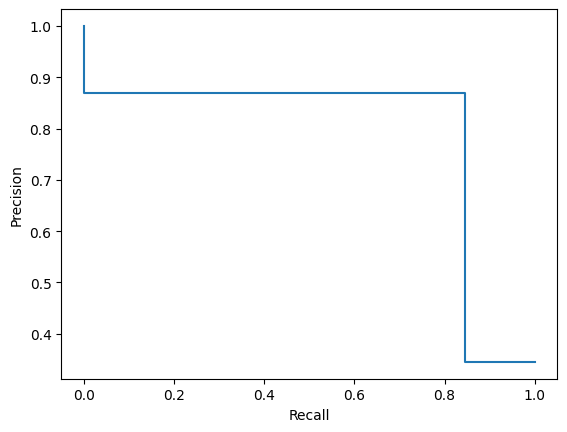

In [21]:
precision, recall, thresh_holds = precision_recall_curve(y_test, y_pred_test)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [22]:
validate = pd.read_csv('test_data.csv')
validate.head()

,UserId,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
0,1116116,NaN,10.0,10.0,1.0,NaN,8.0,3.0,3.0
1,1197080,4.0,1.0,1.0,NaN,2.0,NaN,3.0,2.0
2,1148873,3.0,6.0,6.0,6.0,5.0,10.0,6.0,8.0
3,534555,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN
4,1257200,10.0,10.0,10.0,7.0,10.0,10.0,8.0,2.0


In [23]:
validate.shape

(141, 9)

In [24]:
validate.isna().sum()

UserId       0
Feature1     4
Feature2     7
Feature3     4
Feature4    13
Feature5    13
Feature6    15
Feature7    16
Feature8    18
dtype: int64

In [25]:
#Handling missing data
validate.astype(str).astype(float)

for col in validate.columns:
    if col == 'UserId':
        continue
    
    validate[col].fillna(validate[col].mode()[0], inplace = True)

In [26]:
Id = validate['UserId']
Y = logreg.predict(validate.drop(['UserId'], axis = 1))

In [27]:
ans = pd.concat([Id, pd.Series(Y)], axis = 1)

In [28]:
ans.columns = ['UserId', 'Class']
ans

,UserId,Class
0,1116116,1
1,1197080,0
2,1148873,1
3,534555,0
4,1257200,1
...,...,...
136,1048672,0
137,529329,1
138,1171710,1
139,1200952,0


In [29]:
ans.to_csv('final.csv', index= False)